<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_3/Aula_4_Feriados_e_sazonalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o conteúdo anterior:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
def run_model(df, 
              periods,
              changepoints = None,
              n_changepoints = 25, 
              changepoint_prior_scale = 0.05, 
              changepoint_range = 0.8):
  
  mx = Prophet(changepoints = changepoints, 
               n_changepoints = n_changepoints,
               changepoint_prior_scale = changepoint_prior_scale,
               changepoint_range = changepoint_range) # chama o objeto de modelo
  mx.fit(df) # associa o modelo ao dataframe de treino

  df_prev = mx.make_future_dataframe(periods = periods) # cria o dataframe de previsão que vai ser gerado mas não utilizado fora
  prev = mx.predict(df_prev) # faz a previsao baseada no modelo ajustado e no dataframe de previsao

  return mx, prev # retorna o modelo como elemento [0], e a previsao como elemento [1]

### Para a função rodar na forma mais básica, precisamos apenas passar o dataframe de treino, já formatado como o prophet
### usa, e o periods que vamos estimar os dados.

### Como há uma série de parâmetros da função Prophet, você pode adicioná-los na definição da função.
### Para a aula, vamos brincar com os parâmetros de changepoints, os quais eu deixei com o default da função.

In [3]:
## df_esp = estado de são paulo
## df_sp = cidade de são paulo

df_esp = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/dados_covid_sp.zip?raw=true", compression = "zip", sep = ";")

df_esp.loc[:,"datahora"] = pd.to_datetime(df_esp.loc[:,"datahora"], format = "%Y-%m-%d")

df_sp = df_esp.query("nome_munic == 'São Paulo'")
df_sp.loc[:,"ano"] = pd.DatetimeIndex(df_sp.loc[:,"datahora"]).year

mpl.rcParams["font.size"] = 18

df2 = pd.DataFrame()
df2.loc[:,"ds"] = df_sp.loc[:,"datahora"][:400]
df2.loc[:,"y"] = df_sp.loc[:,"casos_novos"][:400]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
df_sp.loc[:,"ano"]

562       2020
1207      2020
1852      2020
2497      2020
3142      2020
          ... 
283072    2021
283717    2021
284362    2021
285007    2021
285652    2021
Name: ano, Length: 443, dtype: int64

In [5]:
df_sp_2021 = df_sp.query("ano == 2021")

In [6]:
df_2021_01 = df_sp.query("mes == 1 & ano == 2021")
df_2021_02 = df_sp.query("mes == 2 & ano == 2021")

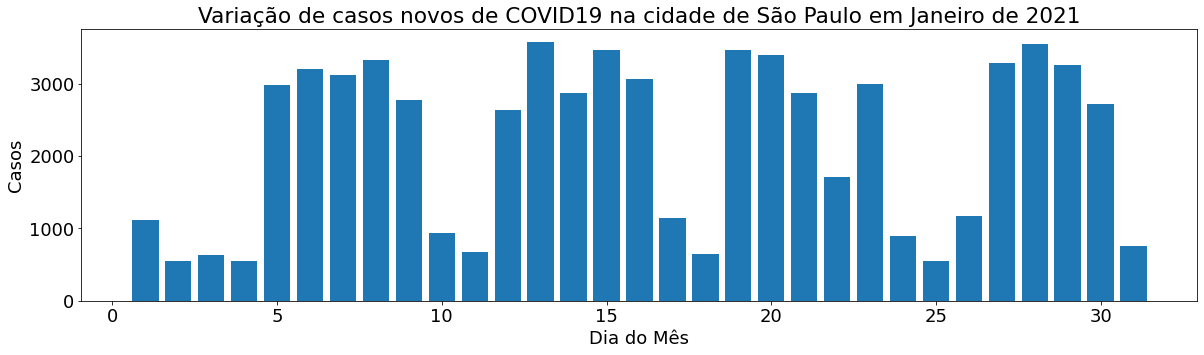

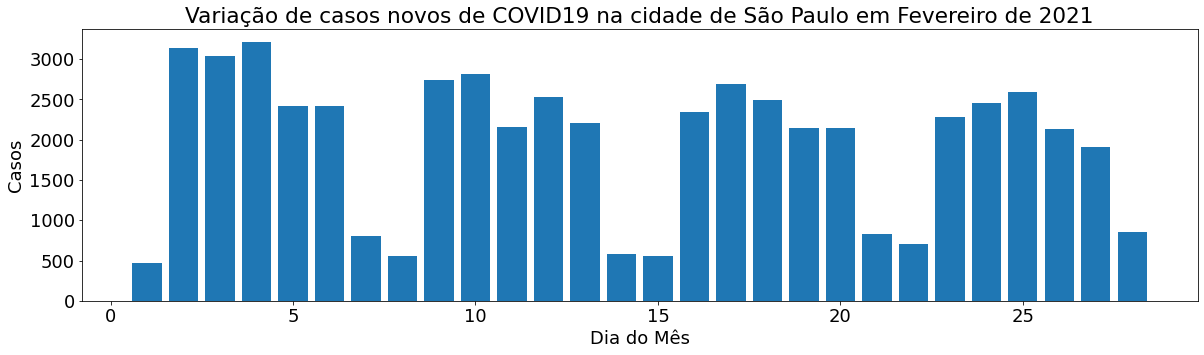

In [7]:
plt.figure(figsize = (20,5))
plt.title("Variação de casos novos de COVID19 na cidade de São Paulo em Janeiro de 2021")
plt.bar(np.linspace(1,31,31), df_2021_01.loc[:,"casos_novos"])
plt.ylabel("Casos")
plt.xlabel("Dia do Mês")
plt.show()
plt.figure(figsize = (20,5))
plt.title("Variação de casos novos de COVID19 na cidade de São Paulo em Fevereiro de 2021")
plt.bar(np.linspace(1,28,28), df_2021_02.loc[:,"casos_novos"])
plt.ylabel("Casos")
plt.xlabel("Dia do Mês")
plt.show()

# Seguindo

In [8]:
m1 = Prophet(changepoint_prior_scale = 10) # pensar em adicionar na automatização da função

In [9]:
m1.add_country_holidays(country_name = "BR")

In [10]:
m1.fit(df2)


df_prev = m1.make_future_dataframe(periods = 43)
prev = m1.predict(df_prev)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


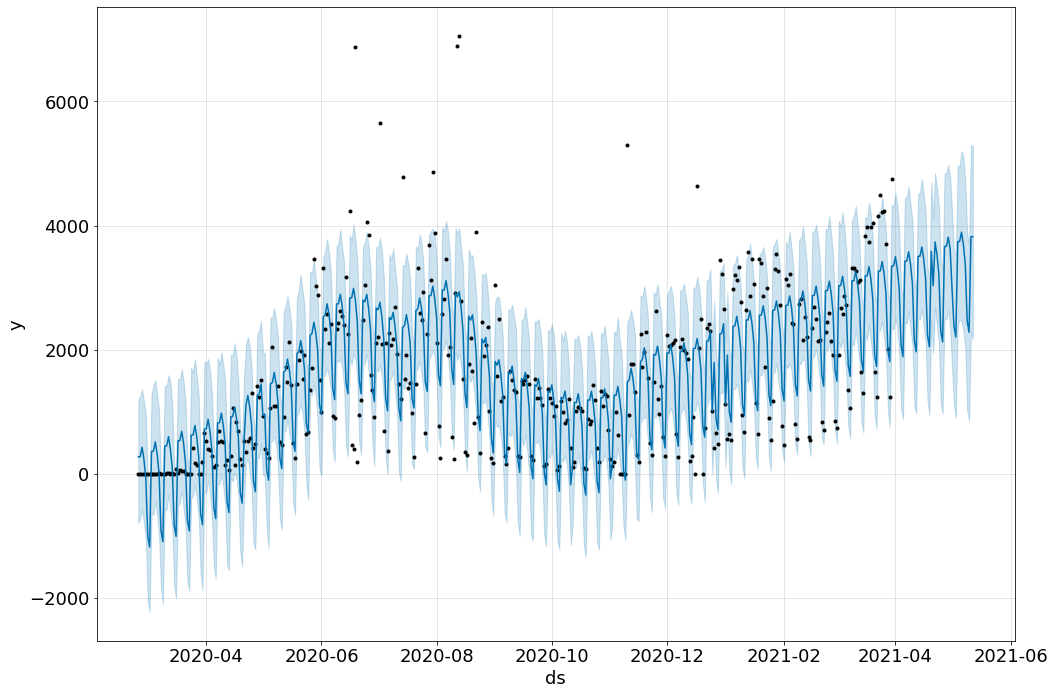

In [11]:
fig = m1.plot(prev, figsize = (15,10))

In [12]:
#Usando feriados especificos do municipio de SP (disponível no notebook da aula)

feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]


feriados_sp_2020 = pd.DataFrame({
  'holiday': 'sp_2020',
  'ds': pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [13]:
m1_f = Prophet(changepoint_prior_scale = 10, holidays = feriados)

m1_f.fit(df2)
df_prev_f = m1_f.make_future_dataframe(periods = 43)

prev_f = m1_f.predict(df_prev_f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


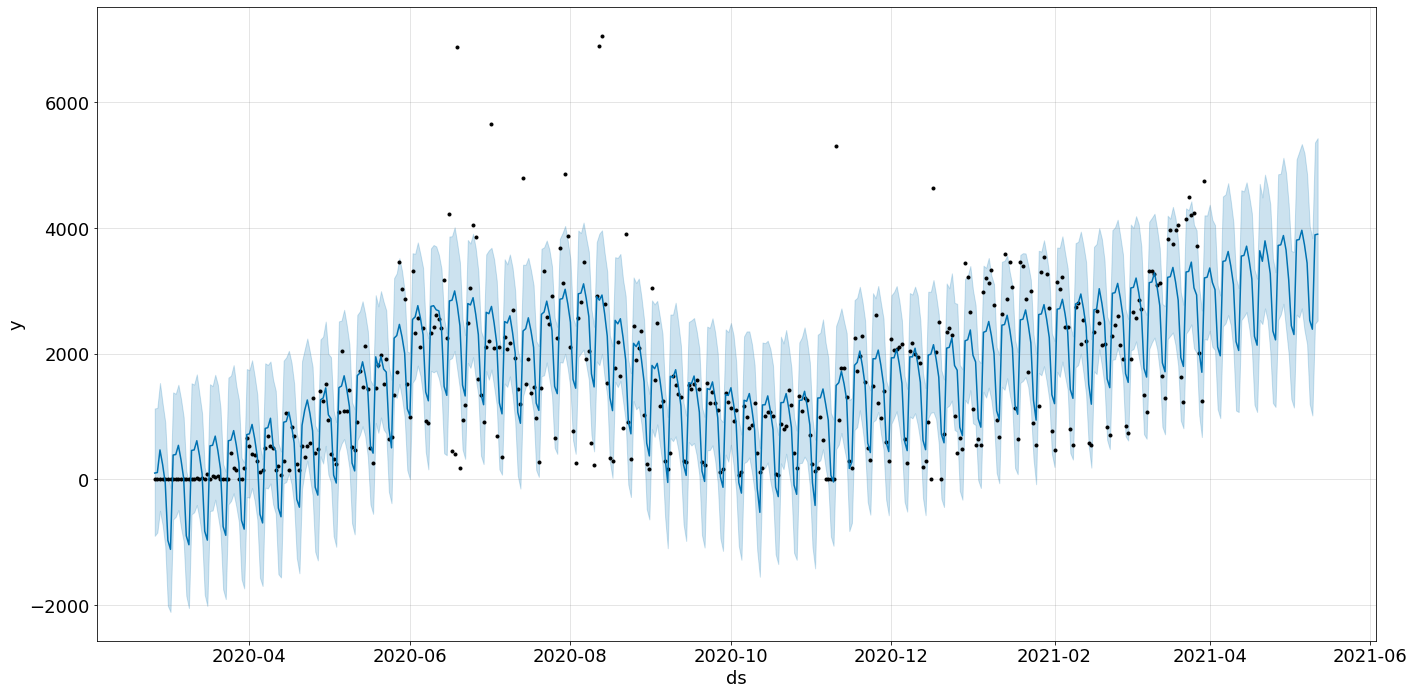

In [14]:
m1_f.plot(prev_f, figsize = (20,10));

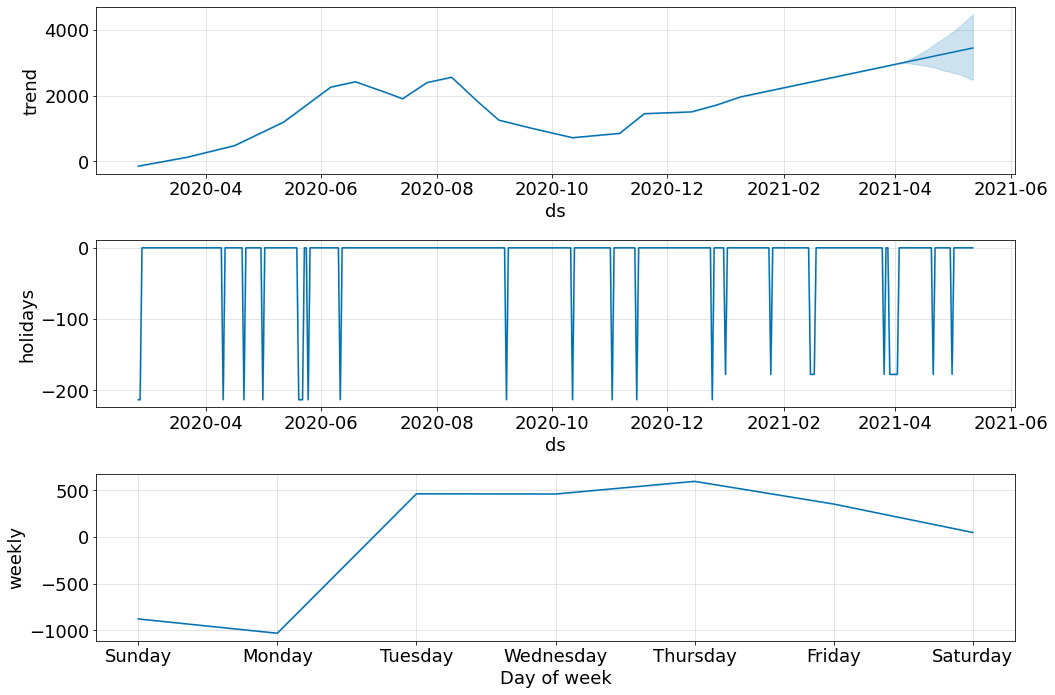

In [15]:
m1_f.plot_components(prev_f, figsize = (15,10));

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
# Sazonalidade aditiva
mean_absolute_error(df2.loc[:,"y"], prev_f.loc[:,"yhat"][:400])

536.6084252994144

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


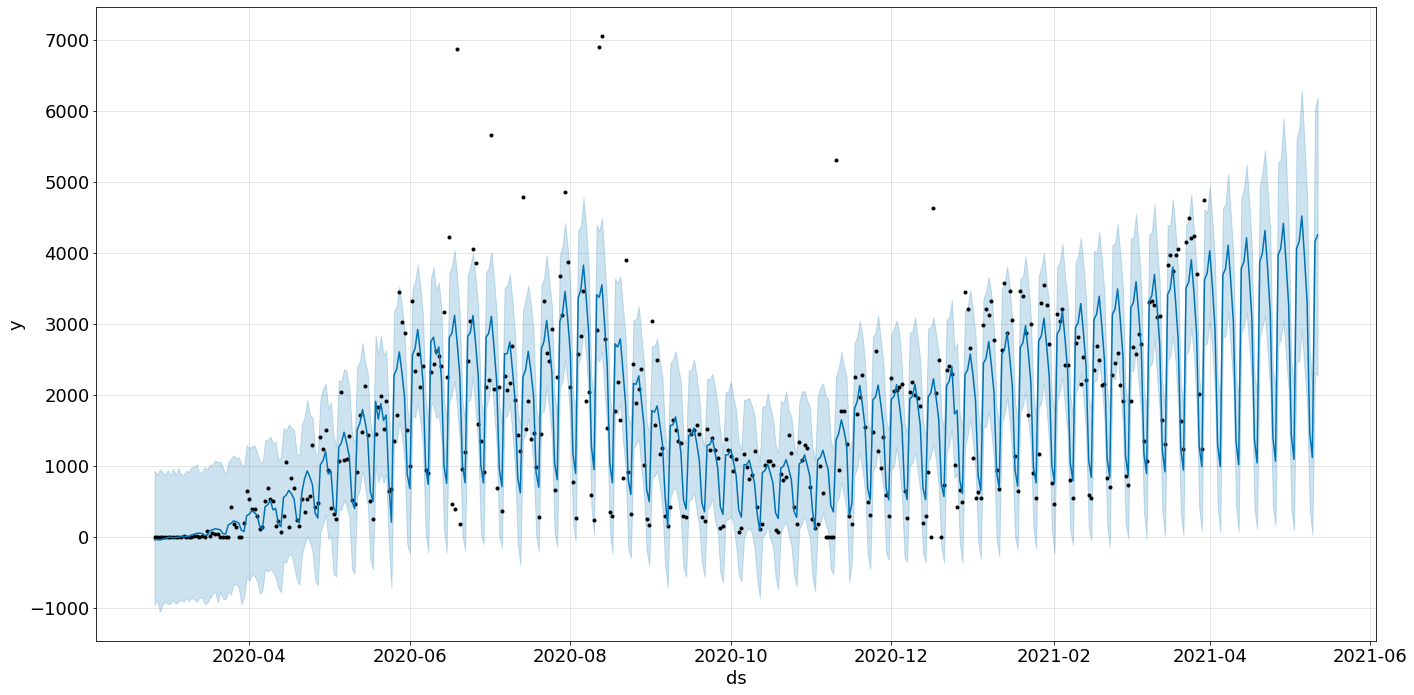

In [18]:
m2_f = Prophet(changepoint_prior_scale = 10, holidays = feriados, seasonality_mode = "multiplicative")

m2_f.fit(df2)
df_prev_f2 = m2_f.make_future_dataframe(periods = 43)

prev_f2 = m2_f.predict(df_prev_f2)

m2_f.plot(prev_f2, figsize = (20,10));

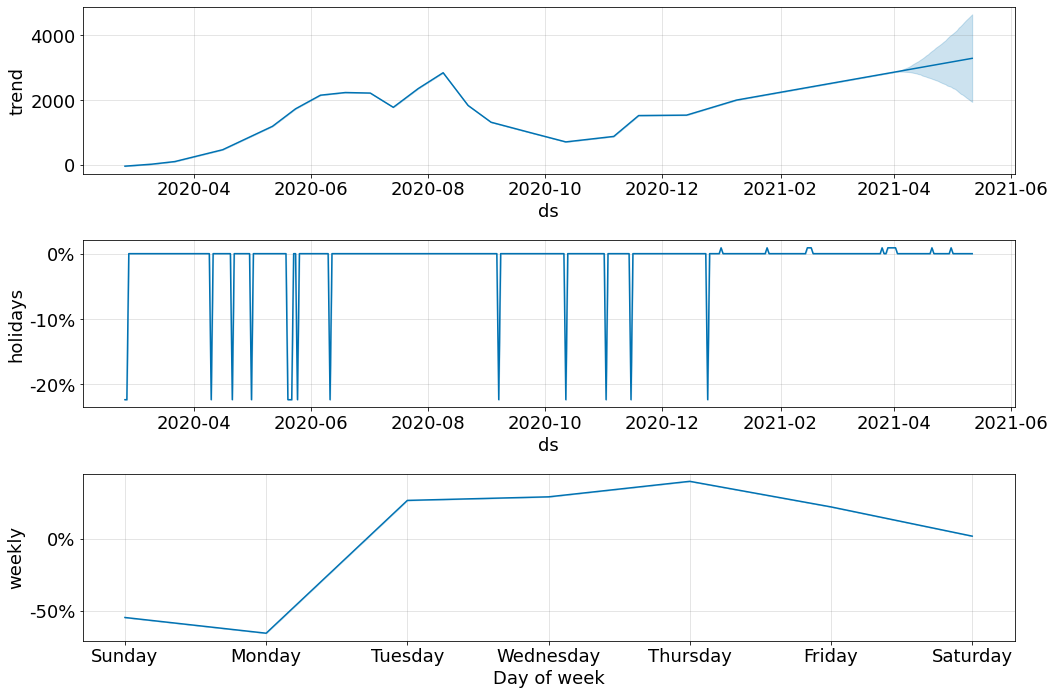

In [19]:
m2_f.plot_components(prev_f2, figsize = (15,10));

In [20]:
# Sazonalidade multiplicativa
mean_absolute_error(df2.loc[:,"y"], prev_f2.loc[:,"yhat"][:400])

452.3618279357078

## Desafio 01 - fazer o gráfico de linhas

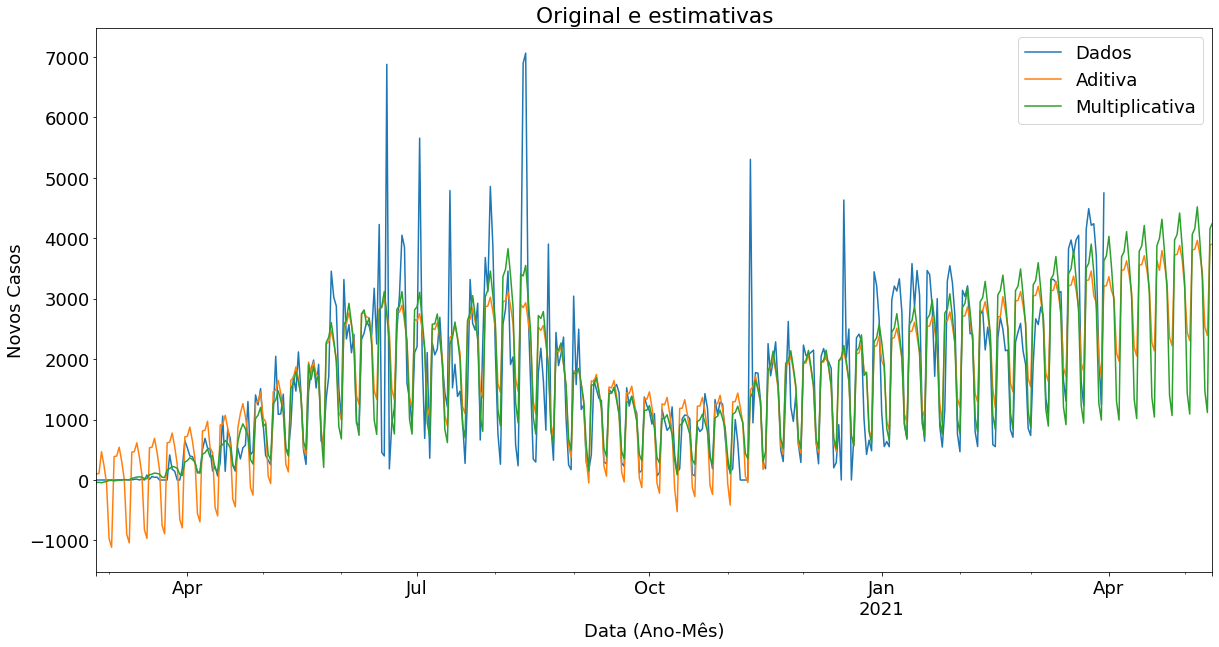

In [21]:
ax = df2.plot(x = "ds", y = "y", figsize = (20,10), label = "Dados")
plt.title("Original e estimativas")
ax.set_ylabel("Novos Casos")
prev_f.plot(x = "ds", y = "yhat", figsize = (20,10), ax = ax, label = "Aditiva")
prev_f2.plot(x = "ds", y = "yhat", figsize = (20,10), ax = ax, label = "Multiplicativa")
ax.set_xlabel("Data (Ano-Mês)")
ax.legend()
plt.show()

## Desafio extra - Utilizar outras métricas do Scikitlearn e comparar os resultados

Métricas de diagnóstico aplicadas a modelos de regressão:

In [22]:
# Variância explicada pelo modelo:
from sklearn.metrics import explained_variance_score

In [23]:
print("Quanto mais próxima de 1, melhor:")
print("Aditiva:", explained_variance_score(df2.loc[:,"y"], prev_f.loc[:,"yhat"][:400])) # aditiva
print("Multiplicativa:", explained_variance_score(df2.loc[:,"y"], prev_f2.loc[:,"yhat"][:400])) # multiplicativa

Quanto mais próxima de 1, melhor:
Aditiva: 0.6328084203989296
Multiplicativa: 0.6848149131164849


In [24]:
# Erro quadrático médio, semelhante ao que usamos em aula:
from sklearn.metrics import mean_squared_error

In [25]:
print("Quanto mais próximo de 0 (ou, nesse caso, quanto menor), melhor:")
print("Aditiva:", mean_squared_error(df2.loc[:,"y"], prev_f.loc[:,"yhat"][:400])) # aditiva
print("Multiplicativa:", mean_squared_error(df2.loc[:,"y"], prev_f2.loc[:,"yhat"][:400])) # multiplicativa

Quanto mais próximo de 0 (ou, nesse caso, quanto menor), melhor:
Aditiva: 609349.6549722457
Multiplicativa: 523056.0437642187


In [26]:
# R², método conservador para comparar de ajustes de modelos, quanto mais próximo de 1, melhor:
from sklearn.metrics import r2_score

In [27]:
print("Quanto mais próximo de 1, melhor:")
print("Aditiva:", r2_score(df2.loc[:,"y"], prev_f.loc[:,"yhat"][:400])) # aditiva
print("Multiplicativa:", r2_score(df2.loc[:,"y"], prev_f2.loc[:,"yhat"][:400])) # multiplicativa

Quanto mais próximo de 1, melhor:
Aditiva: 0.6328084203636588
Multiplicativa: 0.684808593258551
